# Figures for Paper

## SOSE

In [1]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(30)

client = cluster.get_client()

In [2]:
client

<Client: 'tls://10.0.20.49:8786' processes=0 threads=0, memory=0 B>

In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
import gsw
from fastjmd95 import jmd95numba
from fastjmd95 import rho, drhods, drhodt
import json

In [4]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [5]:
omega_total = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/omega_total_newbins.zarr'))
R1 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/R1_newbins.zarr'))

In [6]:
seaice = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/seaicefiles/seaice_no05.zarr')).load()

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/backends/zarr.py:1103: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = open_dataset(


In [7]:
wmt_budget_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/wmt_budget_terms_newbins.zarr'))
wmt_budget_terms.load()

<xarray.Dataset> Size: 7MB
Dimensions:               (time: 438, sigma2_bin: 99)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 792B 1.037e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 4kB 2005-01-06 ... 2010-12-31
Data variables: (12/24)
    R1                    (time, sigma2_bin) float64 347kB nan nan ... 0.0 0.0
    R1_slt                (time, sigma2_bin) float64 347kB nan nan ... 0.0 0.0
    R1_th                 (time, sigma2_bin) float64 347kB nan nan ... 0.0 0.0
    R2                    (time, sigma2_bin) float64 347kB -5.112e+07 ... 0.0
    R2_slt                (time, sigma2_bin) float64 347kB -4.976e+07 ... 0.0
    R2_th                 (time, sigma2_bin) float64 347kB 1.21e+07 ... 0.0
    ...                    ...
    omega_total_th        (time, sigma2_bin) float64 347kB -1.308e+07 ... 0.0
    omega_trans_rate      (time, sigma2_bin) float32 173kB 4.851e+07 ... 0.0
    omega_trans_rate_slt  (time, sigma2_bin) float32 173kB 6.024e+07 ... 0.0
    omega_trans_rate_th   (time, sigma2_bin) float32 173kB -1.173e+07 ... 0.0
    psi_adv               (time, sigma2_bin) float32 173kB -6.458e+07 ... 0.0
    psi_vel               (time, sigma2_bin) float64 347kB -1.346e+07 ... -0.0

In [16]:
#anom_ecco = xr.open_dataset('/home/jovyan/chapter1/ECCO-budgets/anom_ecco')
#anom_soda = xr.open_dataset('/home/jovyan/chapter1/SODA/anom_soda')
anom_sose = xr.open_dataset('/home/jovyan/chapter1/SOSE-budgets/anom_sose')

In [8]:
wmt_budget_terms.coords

Coordinates:
  * sigma2_bin  (sigma2_bin) float64 792B 1.037e+03 1.037e+03 ... 1.037e+03
  * time        (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31

In [9]:
omega_total.omega_total.coords

Coordinates:
  * sigma2_bin  (sigma2_bin) float64 792B 1.037e+03 1.037e+03 ... 1.037e+03
  * time        (time) datetime64[ns] 3kB 2005-01-11 2005-01-16 ... 2010-12-31

In [19]:
R1

<xarray.Dataset> Size: 350kB
Dimensions:     (time: 437, sigma2_bin: 99)
Coordinates:
  * sigma2_bin  (sigma2_bin) float64 792B 1.037e+03 1.037e+03 ... 1.037e+03
  * time        (time) datetime64[ns] 3kB 2005-01-11 2005-01-16 ... 2010-12-31
Data variables:
    R1          (time, sigma2_bin) float64 346kB dask.array<chunksize=(219, 99), meta=np.ndarray>

In [10]:
R1.coords

Coordinates:
  * sigma2_bin  (sigma2_bin) float64 792B 1.037e+03 1.037e+03 ... 1.037e+03
  * time        (time) datetime64[ns] 3kB 2005-01-11 2005-01-16 ... 2010-12-31

In [11]:
wmt_budget_terms['omega_total'] = omega_total.omega_total
wmt_budget_terms['R1'] = R1.R1

In [12]:
wmt_budget_terms = wmt_budget_terms.sel(time=slice('2006', '2010'))
#omega_total = omega_total.sel(time=slice('2006', '2010'))
#R1 = R1.sel(time=slice('2006', '2010'))

In [13]:
wmt_budget_terms.time

<xarray.DataArray 'time' (time: 366)> Size: 3kB
array(['2006-01-01T00:00:00.000000000', '2006-01-06T00:00:00.000000000',
       '2006-01-11T00:00:00.000000000', ..., '2010-12-21T00:00:00.000000000',
       '2010-12-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2006-01-01 2006-01-06 ... 2010-12-31

In [14]:
seaice.time

<xarray.DataArray 'time' (time: 366)> Size: 3kB
array(['2006-01-01T00:00:00.000000000', '2006-01-06T00:00:00.000000000',
       '2006-01-11T00:00:00.000000000', ..., '2010-12-21T00:00:00.000000000',
       '2010-12-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    Z        float32 4B -5.0
  * time     (time) datetime64[ns] 3kB 2006-01-01 2006-01-06 ... 2010-12-31
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

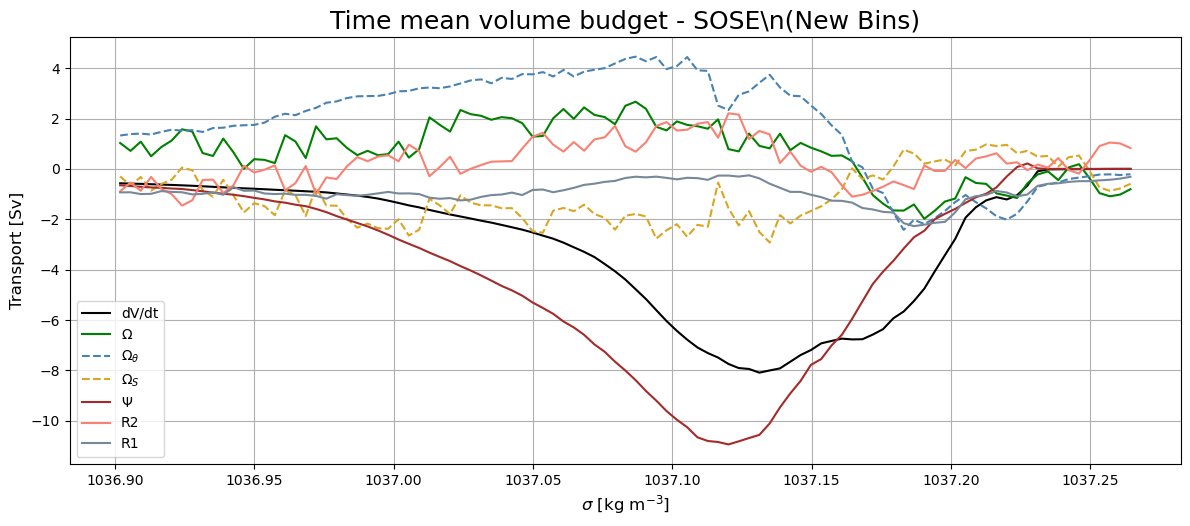

In [15]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Time mean volume budget - SOSE\n(New Bins)', fontsize=18);

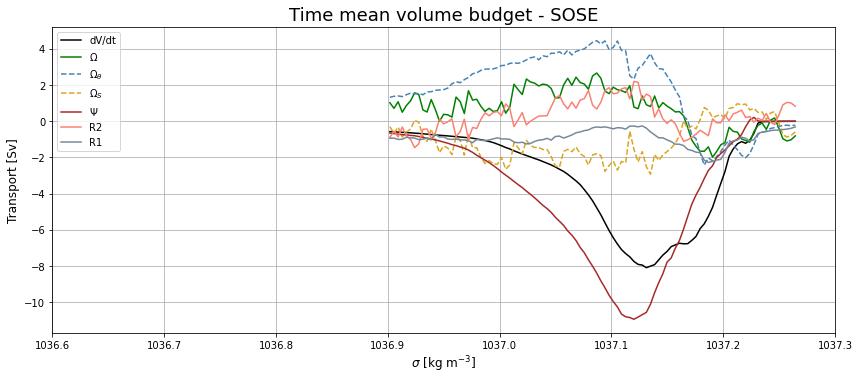

In [19]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
plt.xlim(1036.6, 1037.3)
#plt.ylim(-12, 12)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Time mean volume budget - SOSE', fontsize=18);

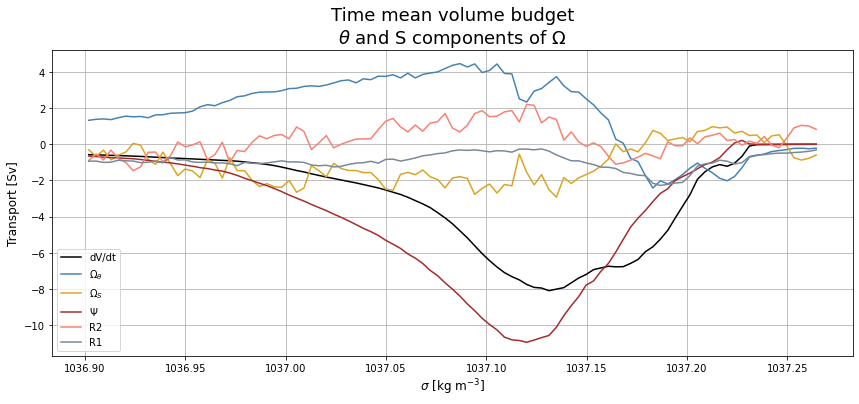

In [20]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.ylim(-12, 12)
#plt.xlim(1036.5, 1037.3)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title("Time mean volume budget\n" r'$\theta$ and S components of $\Omega$', fontsize=18);

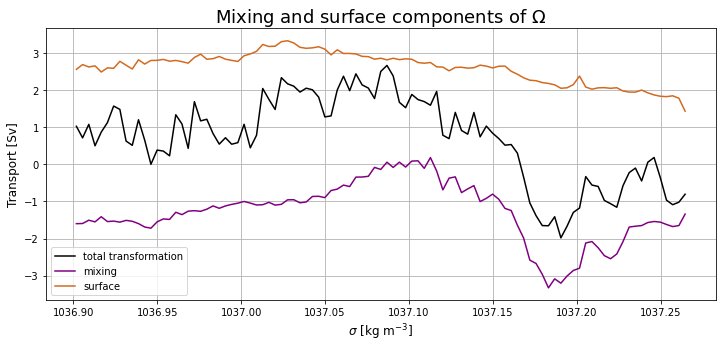

In [21]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total transformation', color='k')#, marker='.')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label='mixing', color='purple')
(wmt_budget_terms.omega_surf/1e6).mean(dim='time').plot(label='surface', color='chocolate')
plt.legend()
plt.grid()
#plt.xlim(1035.5, 1037.5)
#plt.ylim(-6, 6)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Mixing and surface components of $\Omega$', fontsize=18);

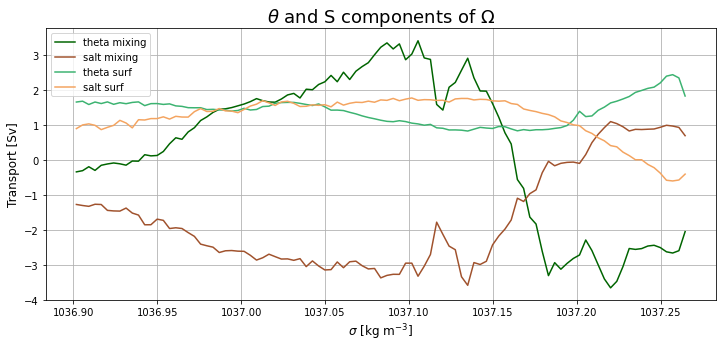

In [22]:
(wmt_budget_terms.omega_mix_th/1e6).mean(dim='time').plot(figsize=(12,5), label='theta mixing', color='darkgreen')
(wmt_budget_terms.omega_mix_slt/1e6).mean(dim='time').plot(label='salt mixing', color='sienna')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label='theta surf', color='mediumseagreen')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label='salt surf', color='sandybrown')
plt.legend()
plt.grid()
#plt.xlim(1035.5, 1037.5)
#plt.ylim(-10, 10)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'$\theta$ and S components of $\Omega$', fontsize=18);

In [80]:
def anom(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    #anom_chunk = anom.chunk({'time':12})
    anom_rolled = anom.rolling(time=73).mean(dim='time') #annual rolling mean to remove seasonal cycle
    return anom_rolled

In [81]:
anom_ds = xr.merge([wmt_budget_terms.dVdt.rename('dVdt'), wmt_budget_terms.R1.rename('R1'), 
                    wmt_budget_terms.psi_vel.rename('psi_vel'), wmt_budget_terms.R2.rename('R2'), 
                    wmt_budget_terms.omega_trans_rate.rename('omega_trans_rate'), 
                    wmt_budget_terms.omega_surf_slt.rename('omega_surf_slt'),
                    wmt_budget_terms.omega_surf_th.rename('omega_surf_th'), 
                    wmt_budget_terms.omega_mix.rename('omega_mix')])


In [82]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [83]:
clim_ds = anom_ds

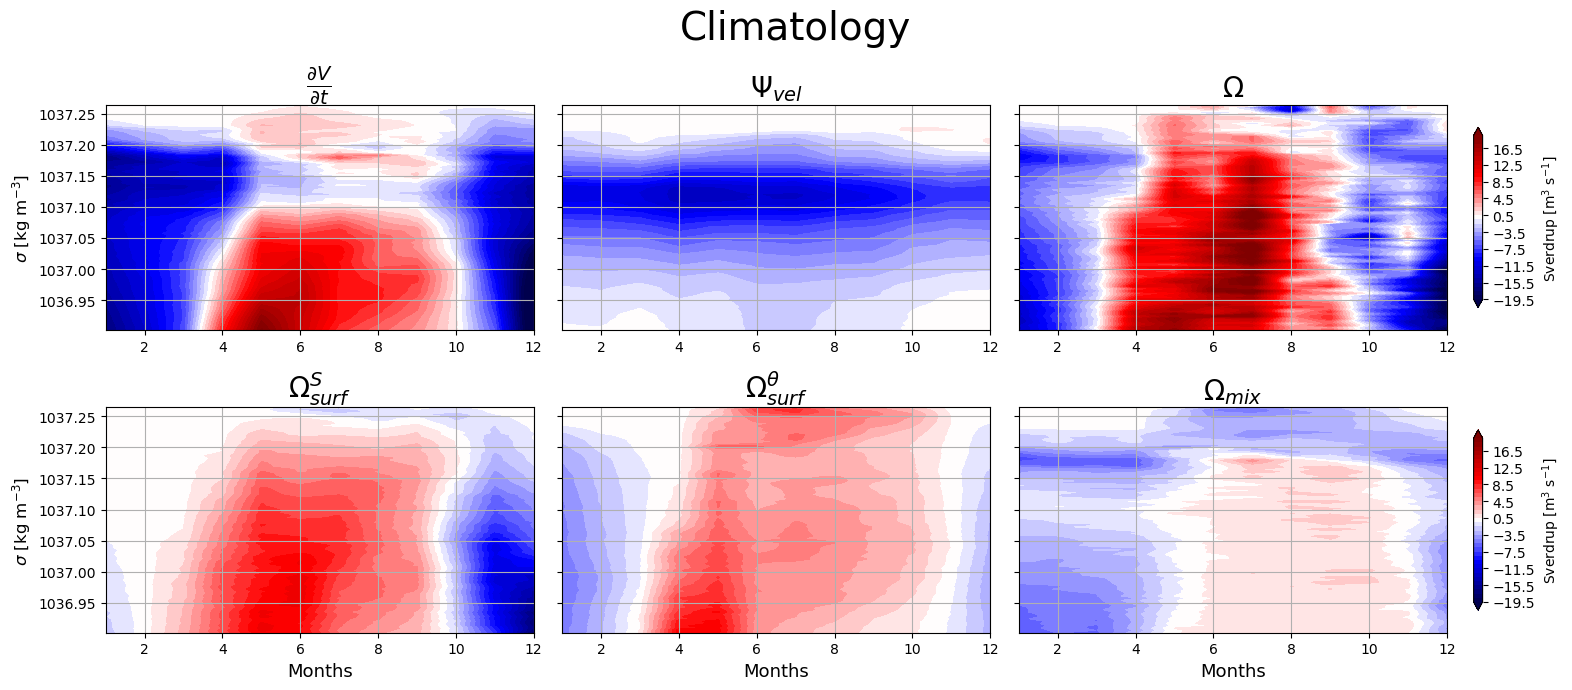

In [84]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-20, 20) + 0.5

dVdt_clim = clim(clim_ds.dVdt) / 1e6
c = ax[0,0].contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin, 
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
#ax[0,0].set_ylim(1037.3, 1035.5)
#ax[0,0].set_xlim(xmin='1993')
ax[0,0].grid()

psi_vel_clim = clim(clim_ds.psi_vel) / 1e6
c_psi = ax[0,1].contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
#ax[0,1].set_ylim(1037.3, 1035.5)
#ax[0,1].set_xlim(xmin='1993')
ax[0,1].grid()

omega_clim = clim(clim_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
#ax[0,2].set_ylim(1037.3, 1035.5)
#ax[0,2].set_xlim(xmin='1993')
ax[0,2].grid()

omega_surf_slt_clim = clim(clim_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].contourf(omega_surf_slt_clim.month, 
                                omega_surf_slt_clim.sigma2_bin, 
                                omega_surf_slt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Months', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
#ax[1,0].set_ylim(1037.3, 1035.5)
#ax[1,0].set_xlim(xmin='1993')
ax[1,0].grid()

omega_surf_th_clim = clim(clim_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].contourf(omega_surf_th_clim.month, omega_surf_th_clim.sigma2_bin, 
                        omega_surf_th_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Months', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
#ax[1,1].set_ylim(1037.3, 1035.5)
#ax[1,1].set_xlim(xmin='1993')
ax[1,1].grid()

omega_mix__clim = clim(clim_ds.omega_mix) / 1e6
c_mix = ax[1,2].contourf(omega_mix__clim.month, omega_mix__clim.sigma2_bin, omega_mix__clim.T, 
                        cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Months', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
#ax[1,2].set_ylim(1037.3, 1035.5)
#ax[1,2].set_xlim(xmin='1993')
ax[1,2].grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

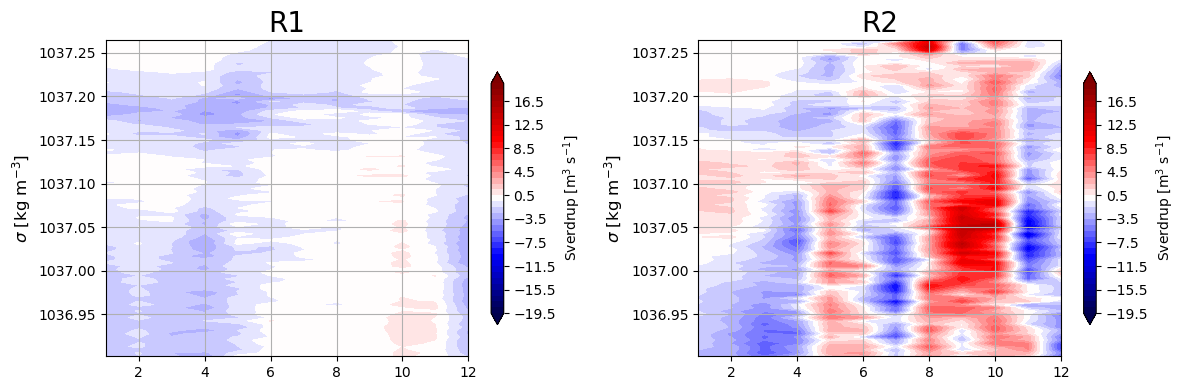

In [85]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

levels = np.arange(-20, 20) + 0.5

R1_clim = clim(clim_ds.R1) / 1e6
c = ax0.contourf(R1_clim.month, 
                   R1_clim.sigma2_bin, 
                   R1_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_title('R1', fontsize=20)
#ax0.set_ylim(1037.3, 1035.5)
ax0.grid()

R2_clim = clim(clim_ds.R2) / 1e6
c = ax1.contourf(R2_clim.month, 
                   R2_clim.sigma2_bin, 
                   R2_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax1)
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
#ax1.set_ylim(1037.3, 1035.5)
ax1.grid()

plt.tight_layout();

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
year_start_index =[0,73, 146, 220, 293]

In [88]:
anom_ds.time

<xarray.DataArray 'time' (time: 366)> Size: 3kB
array(['2006-01-01T00:00:00.000000000', '2006-01-06T00:00:00.000000000',
       '2006-01-11T00:00:00.000000000', ..., '2010-12-21T00:00:00.000000000',
       '2010-12-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2006-01-01 2006-01-06 ... 2010-12-31

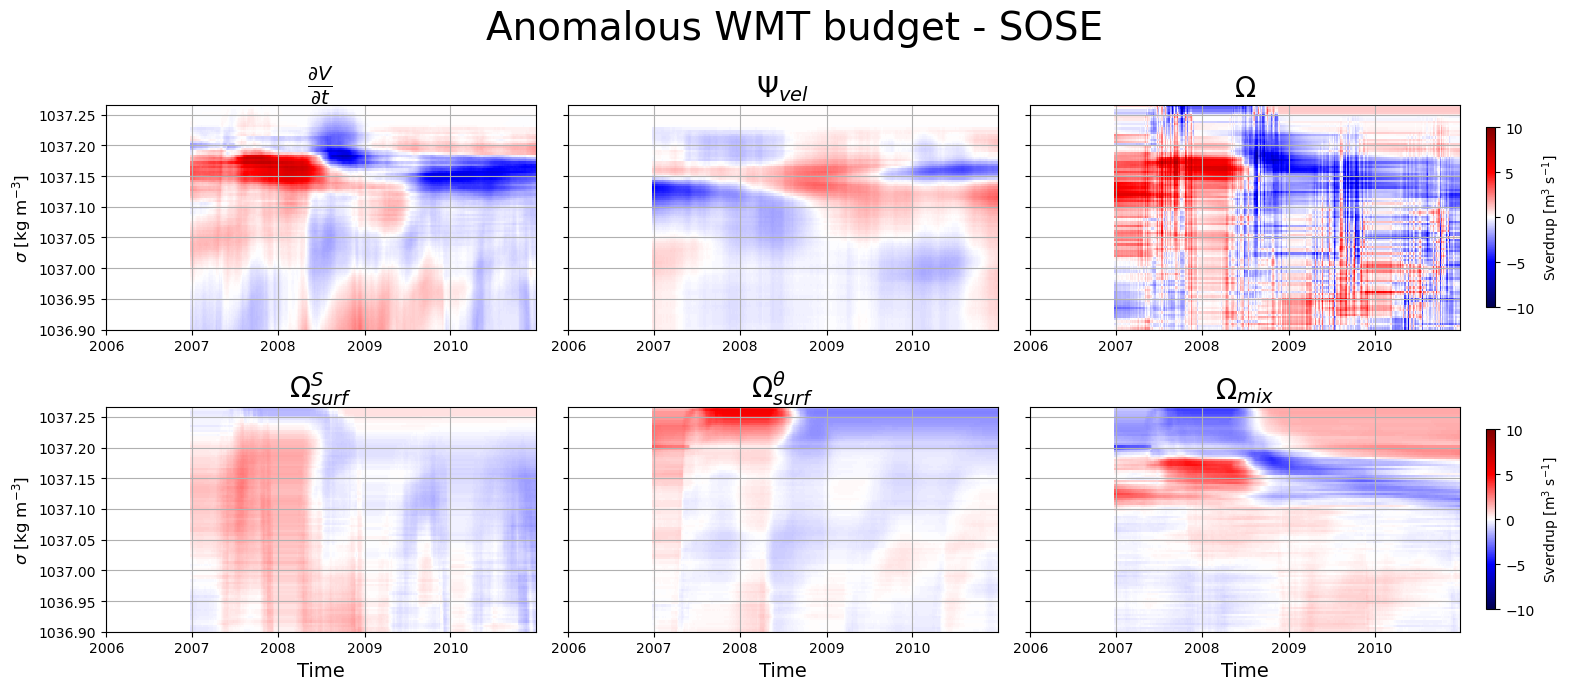

In [89]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

dVdt_anom_rolled = anom(anom_ds.dVdt) / 1e6
c = ax[0,0].pcolormesh(dVdt_anom_rolled.time, 
                   dVdt_anom_rolled.sigma2_bin, 
                   dVdt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
#ax[0,0].set_ylim(1037.3, 1036.5)
ax[0,0].set_xticks(dVdt_anom_rolled.time[year_start_index])
ax[0,0].set_xticklabels(np.arange(2006, 2011))
ax[0,0].grid()

psi_vel_anom_rolled = anom(anom_ds.psi_vel) / 1e6
c_psi = ax[0,1].pcolormesh(psi_vel_anom_rolled.time, psi_vel_anom_rolled.sigma2_bin, psi_vel_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
#ax[0,1].set_ylim(1037.3, 1036.5)
ax[0,1].set_xticks(psi_vel_anom_rolled.time[year_start_index])
ax[0,1].set_xticklabels(np.arange(2006, 2011))
ax[0,1].grid()

omega_anom_rolled = anom(anom_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].pcolormesh(omega_anom_rolled.time, omega_anom_rolled.sigma2_bin, omega_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
#ax[0,2].set_ylim(1037.3, 1036.5)
ax[0,2].set_xticks(omega_anom_rolled.time[year_start_index])
ax[0,2].set_xticklabels(np.arange(2006, 2011))
ax[0,2].grid()

omega_surf_slt_anom_rolled = anom(anom_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].pcolormesh(omega_surf_slt_anom_rolled.time, 
                                omega_surf_slt_anom_rolled.sigma2_bin, 
                                omega_surf_slt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Time', fontsize=14)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
#ax[1,0].set_ylim(1037.3, 1036.5)
ax[1,0].set_xticks(omega_surf_slt_anom_rolled.time[year_start_index])
ax[1,0].set_xticklabels(np.arange(2006, 2011))
ax[1,0].grid()

omega_surf_th_anom_rolled = anom(anom_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].pcolormesh(omega_surf_th_anom_rolled.time, omega_surf_th_anom_rolled.sigma2_bin, 
                        omega_surf_th_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Time', fontsize=14)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
#ax[1,1].set_ylim(1037.3, 1036.5)
ax[1,1].set_xticks(omega_surf_th_anom_rolled.time[year_start_index])
ax[1,1].set_xticklabels(np.arange(2006, 2011))
ax[1,1].grid()

omega_mix_anom_rolled = anom(anom_ds.omega_mix) / 1e6
c_mix = ax[1,2].pcolormesh(omega_mix_anom_rolled.time, omega_mix_anom_rolled.sigma2_bin, omega_mix_anom_rolled.T, 
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Time', fontsize=14)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
#ax[1,2].set_ylim(1037.3, 1036.5)
ax[1,2].set_xticks(omega_mix_anom_rolled.time[year_start_index])
ax[1,2].set_xticklabels(np.arange(2006, 2011))
ax[1,2].grid()

#ax[2,0].plot(seaice_anom.sum(['XC','YC']))
#ax[2,1].plot(seaice_anom.sum(['XC','YC']))
#ax[2,2].plot(seaice_anom.sum(['XC','YC']))

plt.suptitle('Anomalous WMT budget - SOSE', fontsize=28)
plt.tight_layout();

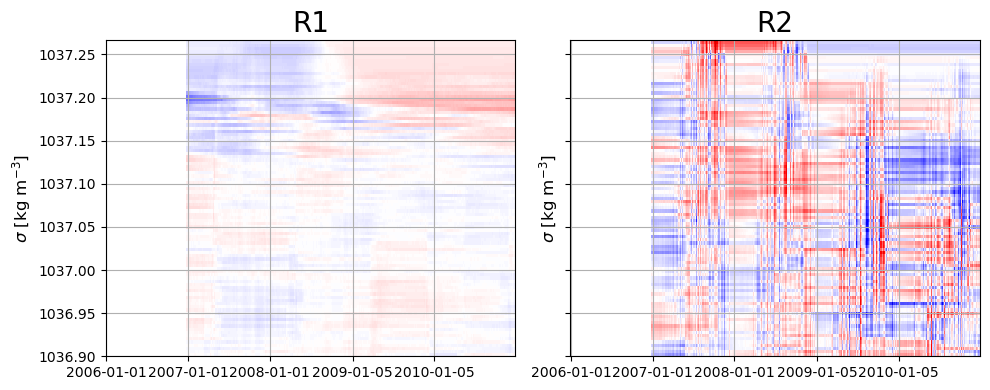

In [90]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)#, gridspec_kw={'width_ratios': [2.4,2.4,3]})#, sharex=True)

R1_anom_rolled = anom(anom_ds.R1) / 1e6
c = ax0.pcolormesh(R1_anom_rolled.time, 
                   R1_anom_rolled.sigma2_bin, 
                   R1_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_title('R1', fontsize=20)
ax0.set_xticks(R1_anom_rolled.time.values[year_start_index])
ax0.grid()

R2_anom_rolled = anom(anom_ds.R2) / 1e6
c = ax1.pcolormesh(R2_anom_rolled.time, 
                   R2_anom_rolled.sigma2_bin, 
                   R2_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
ax1.set_xticks(R2_anom_rolled.time.values[year_start_index])
ax1.grid()
plt.tight_layout();

## Loading in Sea ice, SAM, ENSO timeseries

In [22]:
pwd

'/home/jovyan/chapter1/SOSE-budgets'

In [31]:
sose = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/seaicefiles/sose_si_index.zarr'))
#sam = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/SAM-index/sam_mo_anom') - this same is not normalized
sam = xr.open_dataarray('/home/jovyan/chapter1/Climate-Indices/sam_index')
enso = xr.open_dataarray('/home/jovyan/chapter1/Climate-Indices/ENSO-index/oni')

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/backends/zarr.py:1103: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = open_dataset(


In [26]:
sose_resampled = sose.sose_si_index.resample(time='MS').mean()

In [27]:
sam_sliced = sam.sel(time=slice('2005', '2010')).assign_coords(coords={'time':enso.sel(time=slice('2005', '2010')).time})
sam_sose_time = sam_sliced.groupby('time.year').mean().load()

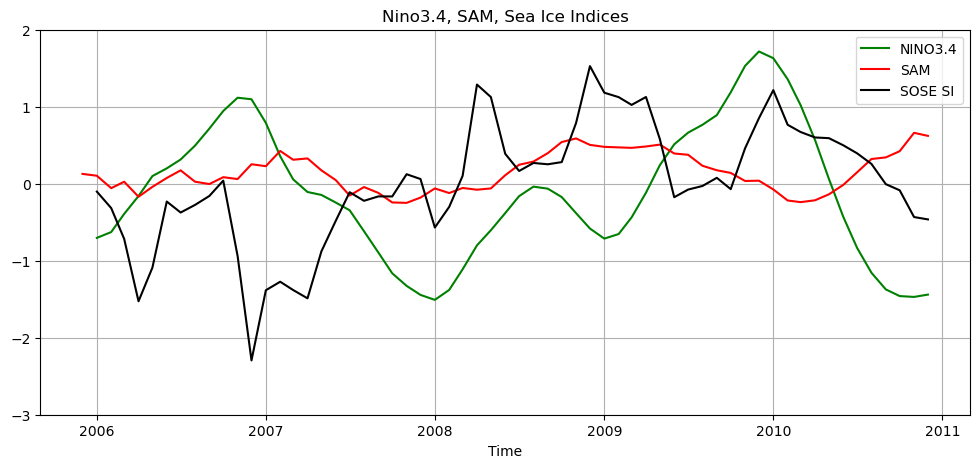

In [40]:
plt.figure(figsize=(12,5))
enso.sel(time=slice('2006', '2010')).plot(color='green', label='NINO3.4')
sam_sliced.__xarray_dataarray_variable__.rolling(time=12).mean().plot(color='red', label='SAM')
sose_resampled.plot(color='k', label='SOSE SI')
plt.legend()
plt.grid()
plt.ylim(-3,2)
plt.ylabel('')
plt.title('Nino3.4, SAM, Sea Ice Indices'); #ylims with 12-mth rolling mean
#plt.ylim(-3,4) #ylims without 12-mth rolling mean;
#plt.xlim('2006', '2010');

In [137]:
ENSO = enso.sel(time=slice('2006', '2010'))
SAM = sam_sliced.sel(time=slice('2006', '2010'))
sose_resampled.time

<xarray.DataArray 'time' (time: 60)> Size: 480B
array(['2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-05-01T00:00:00.000000000', '2008-06-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2008-09-01T00:00:00.000000000', '2008-10-01T00:00:00.000000000',
       '2008-11-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-03-01T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2009-05-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    Z        float32 4B ...
  * time     (time) datetime64[ns] 480B 2006-01-01 2006-02-01 ... 2010-12-01
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

## Windstress indices

In [43]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
#WG model's boundaries after .roll(XC=700) (-77.87497˚S, -62.041634˚S; 295.08334W, 30.083334E)
lower_lat = 0 #YG=-77.9583
upper_lat = 95
left_lon =  310
right_lon = 880

YG_upper = 95 #-61.9583
XG_left = 311 #295.1667
XG_right = 881 #30.166668

In [44]:
#set the boundaries
lat_range_noface = dict(YC=slice(lower_lat, upper_lat))
lon_range_noface = dict(XC=slice(left_lon, right_lon))

lat_range = dict(YC=slice(lower_lat, upper_lat), YG=slice(lower_lat, YG_upper))
lon_range = dict(XC=slice(left_lon, right_lon), XG=slice(XG_left, XG_right))

In [45]:
fs = gcsfs.GCSFileSystem(requester_pays=True)

mapping = fs.get_mapper('gcs://pangeo-ecco-sose')

ds = xr.open_zarr(mapping, consolidated=True)
ds_wg = ds.roll(XC=700, XG=700).isel(**lat_range, **lon_range)

## 

In [22]:
ds_wg.oceTAUX

<xarray.DataArray 'oceTAUX' (time: 438, YC: 95, XG: 570)>
dask.array<getitem, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) float32 295.2 295.3 295.5 295.7 ... 29.5 29.67 29.83 30.0
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -62.54 -62.37 -62.21
    dxC      (YC, XG) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    dyG      (YC, XG) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rAw      (YC, XG) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      zonal surface wind stress, >0 increases uVel
    mate:           oceTAUY
    standard_name:  oceTAUX
    units:          N/m^2

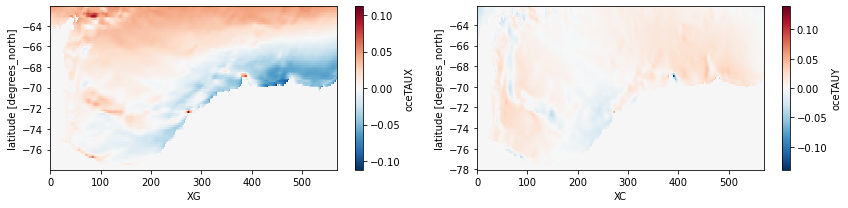

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
ds_wg.oceTAUX.drop('XG').mean(dim='time').plot(ax=ax1)
ds_wg.oceTAUY.drop('XC').mean(dim='time').plot(ax=ax2)
plt.tight_layout();

In [47]:
weighted_taux = ds_wg.oceTAUX * ds_wg.rAw
weighted_tauy = ds_wg.oceTAUY * ds_wg.rAs

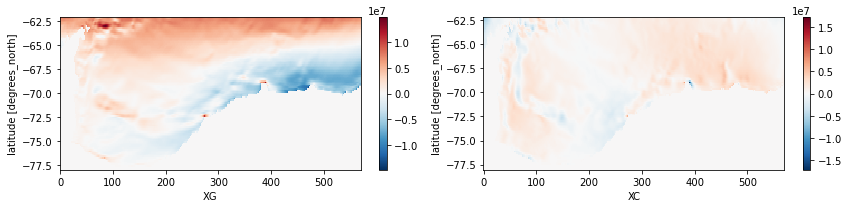

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
weighted_taux.drop('XG').mean(dim='time').plot(ax=ax1)
weighted_tauy.drop('XC').mean(dim='time').plot(ax=ax2)
plt.tight_layout();

In [48]:
taux_anom = (weighted_taux.resample(time='MS').mean().groupby('time.month') 
             - weighted_taux.resample(time='MS').mean().groupby('time.month').mean('time'))
tauy_anom = (weighted_tauy.resample(time='MS').mean().groupby('time.month') 
             - weighted_tauy.resample(time='MS').mean().groupby('time.month').mean('time'))

In [27]:
tauy_anom

<xarray.DataArray (time: 72, YG: 95, XC: 570)>
dask.array<getitem, shape=(72, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2005-01-01 2005-02-01 ... 2010-12-01
  * XC       (XC) float32 295.1 295.2 295.4 295.6 ... 29.42 29.58 29.75 29.92
  * YG       (YG) float32 -77.96 -77.79 -77.62 -77.46 ... -62.62 -62.46 -62.29
    dxG      (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    dyC      (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    rAs      (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [49]:
taux_index = taux_anom.sum(['YC','XG'])/taux_anom.sum(['YC','XG']).std(dim='time')
tauy_index = tauy_anom.sum(['YG','XC'])/tauy_anom.sum(['YG','XC']).std(dim='time')

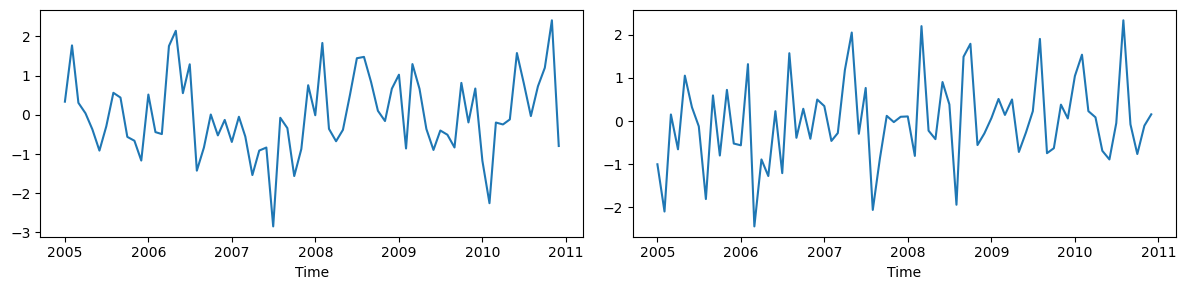

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
taux_index.plot(ax=ax1)
tauy_index.plot(ax=ax2)
plt.tight_layout();

## Windstress curl indices

$$ \frac{\partial \tau_y}{\partial x} - \frac{\partial \tau_x}{\partial y}$$

In [50]:
ds_wg

<xarray.Dataset>
Dimensions:   (time: 438, Zl: 42, YC: 95, XC: 570, Z: 42, XG: 570, YG: 95, Zp1: 43, Zu: 42)
Coordinates: (12/26)
    Depth     (YC, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    PHrefF    (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
  * XC        (XC) float32 295.1 295.2 295.4 295.6 ... 29.42 29.58 29.75 29.92
  * XG        (XG) float32 295.2 295.3 295.5 295.7 ... 29.5 29.67 29.83 30.0
  * YC        (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -62.54 -62.37 -62.21
    ...        ...
    iter      (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA        (YC, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    rAs       (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    rAz       (YG, XG) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables: (12/56)
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    ...        ...
    oceFreez  (time, YC, XC) float32 dask.array<chunksize=(1, 95, 570), meta=np.ndarray>
    oceQsw    (time, YC, XC) float32 dask.array<chunksize=(1, 95, 570), meta=np.ndarray>
    oceTAUX   (time, YC, XG) float32 dask.array<chunksize=(1, 95, 570), meta=np.ndarray>
    oceTAUY   (time, YG, XC) float32 dask.array<chunksize=(1, 95, 570), meta=np.ndarray>
    surForcS  (time, YC, XC) float32 dask.array<chunksize=(1, 95, 570), meta=np.ndarray>
    surForcT  (time, YC, XC) float32 dask.array<chunksize=(1, 95, 570), meta=np.ndarray>

In [51]:
import xgcm

grid = xgcm.Grid(ds_wg, coords={'X': {'center': 'XC', 'right': 'XG'}, 
                              'Y': {'center': 'YC', 'right': 'YG'},
                              'T': {'center': 'time'}},
                      periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   XC --> right
  * right    XG --> center
Y Axis (not periodic, boundary=None):
  * center   YC --> right
  * right    YG --> center
T Axis (not periodic, boundary=None):
  * center   time

In [52]:
tauy_anom

<xarray.DataArray (time: 72, YG: 95, XC: 570)> Size: 16MB
dask.array<sub, shape=(72, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 2kB 51.75 51.92 52.08 52.25 ... 146.2 146.4 146.6
  * YG       (YG) float32 380B -77.96 -77.79 -77.62 ... -62.62 -62.46 -62.29
    dxG      (YG, XC) float32 217kB dask.array<chunksize=(95, 570), meta=np.ndarray>
    dyC      (YG, XC) float32 217kB dask.array<chunksize=(95, 570), meta=np.ndarray>
    rAs      (YG, XC) float32 217kB dask.array<chunksize=(95, 570), meta=np.ndarray>
  * time     (time) datetime64[ns] 576B 2005-01-01 2005-02-01 ... 2010-12-01
    month    (time) int64 576B 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

In [53]:
#calculating meters per latitudinal & longitudinal degree
earth_radius = 6.371e6
earth_circumference = 2*np.pi*earth_radius
meters_per_degree = earth_circumference / 360

#converting lat from degrees to meters
delta_lat = grid.diff(ds_wg.YC, 'Y', boundary='fill', fill_value=np.nan)
dy = delta_lat * meters_per_degree

#converting degrees lon to lon [meters] (pinching at the poles)
delta_lon = grid.diff(ds_wg.XC, 'X')#, boundary_discontinuity=360)
dx = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds_wg.YC))

/srv/conda/envs/notebook/lib/python3.12/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [33]:
dy

<xarray.DataArray (YG: 95)>
array([18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.205,
       18533.055, 18532.205, 18532.205, 18533.055, 18532.205, 18532.629,
       18532.205, 18532.629, 18532.629, 18532.205, 18532.629, 18532.629,
       18532.205, 18532.629, 18532.629, 18532.205,       nan],
      dtype=float32)
Coordinates:
  * YG       (YG) float32 -77.96 -77.79 -77.62 -77.46 ... -62.62 -62.46 -62.29

In [34]:
dx

<xarray.DataArray (XG: 570, YC: 95)>
array([[3.8924321e+03, 3.9451196e+03, 3.9977720e+03, ..., 8.5448828e+03,
        8.5926787e+03, 8.6404014e+03],
       [3.8931448e+03, 3.9458420e+03, 3.9985037e+03, ..., 8.5464473e+03,
        8.5942520e+03, 8.6419834e+03],
       [3.8924321e+03, 3.9451196e+03, 3.9977720e+03, ..., 8.5448828e+03,
        8.5926787e+03, 8.6404014e+03],
       ...,
       [3.8926548e+03, 3.9453455e+03, 3.9980007e+03, ..., 8.5453721e+03,
        8.5931709e+03, 8.6408965e+03],
       [3.8926992e+03, 3.9453904e+03, 3.9980461e+03, ..., 8.5454697e+03,
        8.5932686e+03, 8.6409941e+03],
       [6.1932380e+06, 6.2770690e+06, 6.3608440e+06, ..., 1.3595740e+07,
        1.3671788e+07, 1.3747720e+07]], dtype=float32)
Coordinates:
  * XG       (XG) float32 295.2 295.3 295.5 295.7 ... 29.5 29.67 29.83 30.0
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -62.54 -62.37 -62.21

In [35]:
weighted_tauy

<xarray.DataArray (time: 438, YG: 95, XC: 570)>
dask.array<mul, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 295.1 295.2 295.4 295.6 ... 29.42 29.58 29.75 29.92
  * YG       (YG) float32 -77.96 -77.79 -77.62 -77.46 ... -62.62 -62.46 -62.29
    dxG      (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    dyC      (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rAs      (YG, XC) float32 dask.array<chunksize=(95, 570), meta=np.ndarray>
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

In [57]:
dtauy = grid.diff(weighted_tauy, 'X')
dtaux = grid.diff(weighted_taux, 'Y', boundary='fill', fill_value=np.nan)

/srv/conda/envs/notebook/lib/python3.12/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [58]:
dtaux

<xarray.DataArray (time: 438, YG: 95, XG: 570)> Size: 95MB
dask.array<transpose, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) float32 2kB 51.83 52.0 52.17 52.33 ... 146.2 146.3 146.5 146.7
  * YG       (YG) float32 380B -77.96 -77.79 -77.62 ... -62.62 -62.46 -62.29
  * time     (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31

In [59]:
dx_interp = grid.interp(dx, 'Y', boundary='fill', fill_value=np.nan)

/srv/conda/envs/notebook/lib/python3.12/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [60]:
dx_interp

<xarray.DataArray (XG: 570, YG: 95)> Size: 217kB
array([[ 3.9190449e+03,  3.9717183e+03,  4.0243569e+03, ...,
         8.5693691e+03,  8.6171309e+03,            nan],
       [ 3.9190449e+03,  3.9717183e+03,  4.0243569e+03, ...,
         8.5693691e+03,  8.6171309e+03,            nan],
       [ 3.9189551e+03,  3.9716274e+03,  4.0242651e+03, ...,
         8.5691738e+03,  8.6169346e+03,            nan],
       ...,
       [ 3.9191348e+03,  3.9718096e+03,  4.0244495e+03, ...,
         8.5695664e+03,  8.6173301e+03,            nan],
       [ 3.9191348e+03,  3.9718096e+03,  4.0244495e+03, ...,
         8.5695664e+03,  8.6173301e+03,            nan],
       [-2.2299198e+06, -2.2598908e+06, -2.2898420e+06, ...,
        -4.8759340e+06, -4.9031110e+06,            nan]], dtype=float32)
Coordinates:
  * XG       (XG) float32 2kB 51.83 52.0 52.17 52.33 ... 146.2 146.3 146.5 146.7
  * YG       (YG) float32 380B -77.96 -77.79 -77.62 ... -62.62 -62.46 -62.29

In [61]:
windstress_curl = (dtauy / dx_interp) - (dtaux/dy)
windstress_curl

<xarray.DataArray (time: 438, YG: 95, XG: 570)> Size: 95MB
dask.array<sub, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) float32 2kB 51.83 52.0 52.17 52.33 ... 146.2 146.3 146.5 146.7
  * YG       (YG) float32 380B -77.96 -77.79 -77.62 ... -62.62 -62.46 -62.29
  * time     (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31

/tmp/ipykernel_1132/359245583.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  windstress_curl.mean('time').drop('XG').plot()


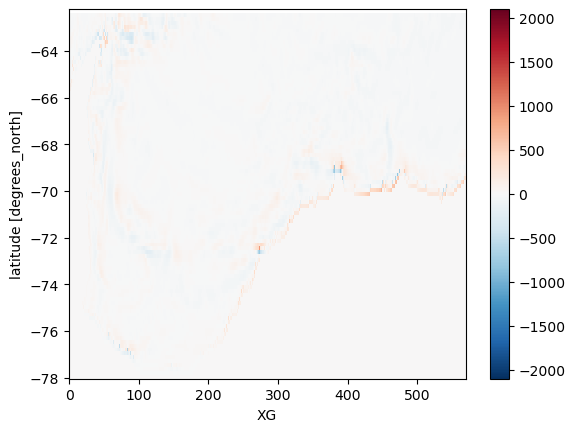

In [62]:
windstress_curl.mean('time').drop('XG').plot()

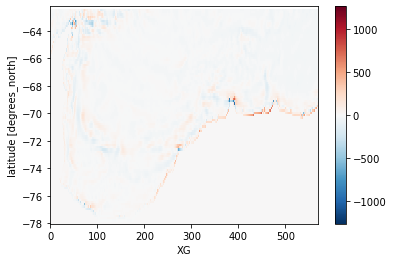

In [70]:
windstress_curl.mean('time').drop('XG').plot()

In [63]:
windstress_curl_mo = windstress_curl.resample(time='MS').mean()

In [64]:
windstress_curl_mo

<xarray.DataArray (time: 72, YG: 95, XG: 570)> Size: 16MB
dask.array<transpose, shape=(72, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) float32 2kB 51.83 52.0 52.17 52.33 ... 146.2 146.3 146.5 146.7
  * YG       (YG) float32 380B -77.96 -77.79 -77.62 ... -62.62 -62.46 -62.29
  * time     (time) datetime64[ns] 576B 2005-01-01 2005-02-01 ... 2010-12-01

In [65]:
windstress_curl_anom = windstress_curl_mo.groupby('time.month') - windstress_curl_mo.groupby('time.month').mean('time')
windstress_curl_anom

<xarray.DataArray (time: 72, YG: 95, XG: 570)> Size: 16MB
dask.array<sub, shape=(72, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) float32 2kB 51.83 52.0 52.17 52.33 ... 146.2 146.3 146.5 146.7
  * YG       (YG) float32 380B -77.96 -77.79 -77.62 ... -62.62 -62.46 -62.29
  * time     (time) datetime64[ns] 576B 2005-01-01 2005-02-01 ... 2010-12-01
    month    (time) int64 576B 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

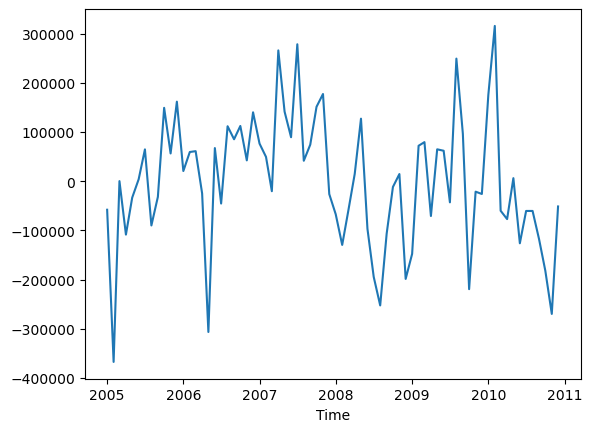

In [66]:
windstress_curl_anom.sum(['XG', 'YG']).plot()

In [67]:
windstress_curl_index = windstress_curl_anom.sum(['YG','XG'])/windstress_curl_anom.sum(['YG','XG']).std(dim='time')
windstress_curl_index

<xarray.DataArray (time: 72)> Size: 288B
dask.array<truediv, shape=(72,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 576B 2005-01-01 2005-02-01 ... 2010-12-01
    month    (time) int64 576B 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

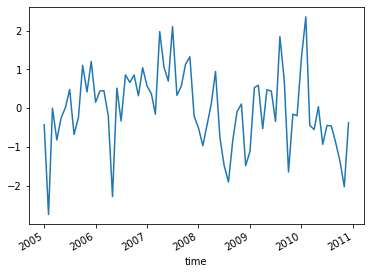

In [47]:
windstress_curl_index.plot()

## NET FW / heat fluxes as indices

In [68]:
coords = ds_wg.coords.to_dataset().reset_coords()
ds_wg = ds_wg.reset_coords(drop=True)

In [69]:
mask = coords.hFacC[0]>0

#### FW Flux

In [50]:
ds_wg.SIempmr

<xarray.DataArray 'SIempmr' (time: 438, YC: 95, XC: 570)>
dask.array<getitem, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 295.1 295.2 295.4 295.6 ... 29.42 29.58 29.75 29.92
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -62.54 -62.37 -62.21
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      Ocean surface freshwater flux, > 0 increases salt
    standard_name:  SIempmr
    units:          kg/m^2/s

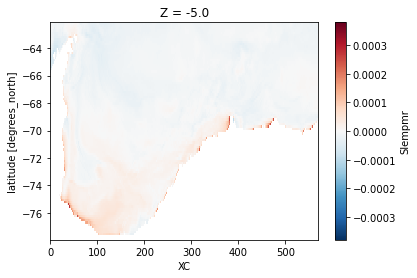

In [51]:
ds_wg.SIempmr.mean(dim='time').where(mask).drop('XC').plot()

In [70]:
fw_flx_anom = ds_wg.SIempmr.where(mask).groupby('time.month') - ds_wg.SIempmr.where(mask).groupby('time.month').mean()
fw_flx_anom

<xarray.DataArray 'SIempmr' (time: 438, YC: 95, XC: 570)> Size: 95MB
dask.array<sub, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 2kB 51.75 51.92 52.08 52.25 ... 146.2 146.4 146.6
  * YC       (YC) float32 380B -77.87 -77.71 -77.54 ... -62.54 -62.37 -62.21
  * time     (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31
    Z        (time) float32 2kB -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    month    (time) int64 4kB 1 1 1 1 1 1 2 2 2 2 ... 11 11 12 12 12 12 12 12 12

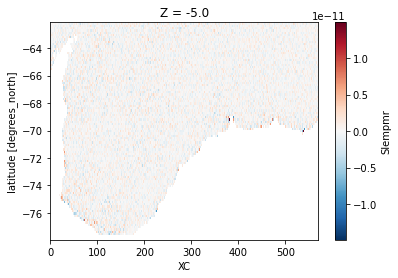

In [53]:
fw_flx_anom.mean('time').drop('XC').plot()

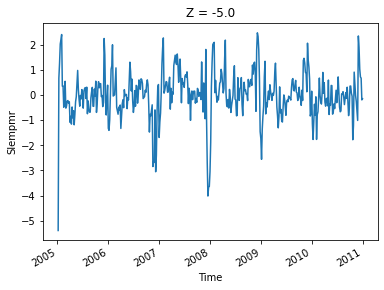

In [54]:
fw_flx_anom.sum(['XC', 'YC']).plot()

In [71]:
fw_flx_index = fw_flx_anom.sum(['XC', 'YC'])/fw_flx_anom.sum(['XC', 'YC']).std(dim='time')
fw_flx_index

<xarray.DataArray 'SIempmr' (time: 438)> Size: 2kB
dask.array<truediv, shape=(438,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31
    Z        (time) float32 2kB -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    month    (time) int64 4kB 1 1 1 1 1 1 2 2 2 2 ... 11 11 12 12 12 12 12 12 12

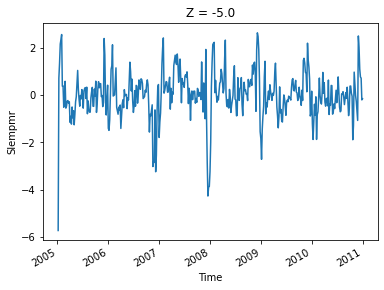

In [56]:
fw_flx_index.plot()

#### Heat Flux

In [57]:
ds_wg.TFLUX

<xarray.DataArray 'TFLUX' (time: 438, YC: 95, XC: 570)>
dask.array<getitem, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 295.1 295.2 295.4 295.6 ... 29.42 29.58 29.75 29.92
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -62.54 -62.37 -62.21
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      total heat flux (match heat-content variations), >0 incre...
    standard_name:  TFLUX
    units:          W/m^2

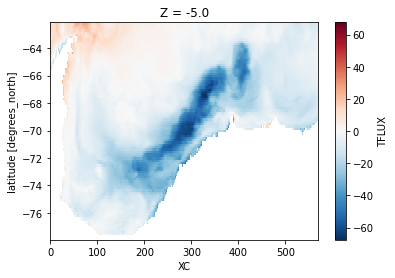

In [58]:
ds_wg.TFLUX.mean(dim='time').where(mask).drop('XC').plot()

In [72]:
heat_flx_anom = ds_wg.TFLUX.where(mask).groupby('time.month') - ds_wg.TFLUX.where(mask).groupby('time.month').mean()
heat_flx_anom

<xarray.DataArray 'TFLUX' (time: 438, YC: 95, XC: 570)> Size: 95MB
dask.array<sub, shape=(438, 95, 570), dtype=float32, chunksize=(1, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 2kB 51.75 51.92 52.08 52.25 ... 146.2 146.4 146.6
  * YC       (YC) float32 380B -77.87 -77.71 -77.54 ... -62.54 -62.37 -62.21
  * time     (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31
    Z        (time) float32 2kB -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    month    (time) int64 4kB 1 1 1 1 1 1 2 2 2 2 ... 11 11 12 12 12 12 12 12 12

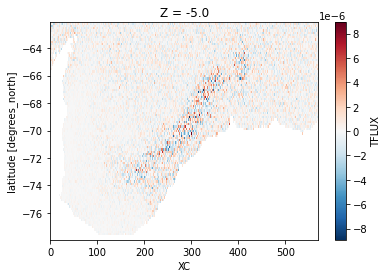

In [60]:
heat_flx_anom.mean('time').drop('XC').plot()

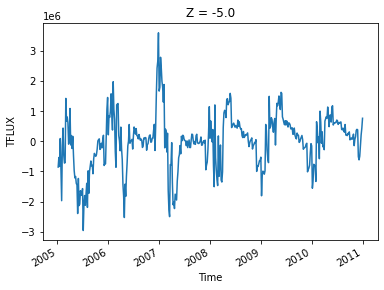

In [61]:
heat_flx_anom.sum(['XC', 'YC']).plot()

In [73]:
heat_flx_index = heat_flx_anom.sum(['XC', 'YC'])/heat_flx_anom.sum(['XC', 'YC']).std(dim='time')
heat_flx_index

<xarray.DataArray 'TFLUX' (time: 438)> Size: 2kB
dask.array<truediv, shape=(438,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 4kB 2005-01-06 2005-01-11 ... 2010-12-31
    Z        (time) float32 2kB -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    month    (time) int64 4kB 1 1 1 1 1 1 2 2 2 2 ... 11 11 12 12 12 12 12 12 12

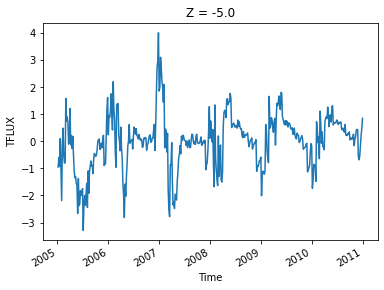

In [63]:
heat_flx_index.plot()

## Water mass classes timeseries

In [115]:
pwd

'/home/jovyan/chapter1/SOSE-budgets'

In [116]:
import sys
#telling python where the module lives
sys.path.insert(0, '/home/jovyan/chapter1/')
from sum_wm_bins import sum_wm_bins

In [118]:
sum_wm_bins?

Signature: sum_wm_bins(da, wm_type)
Docstring:
Sum the bins within a specified water mass class
slice values are from water-masses-defined.ipynb in ECCO dir
File:      ~/chapter1/sum_wm_bins.py
Type:      function

In [119]:
sum_wm_bins(omega_anom_rolled, 'wssw')

WM TypeError: unspecified water mass type provided


In [117]:
wm_type = ['cdw', 'wsdw', 'wsbw', 'isw']

wmt_terms = [dVdt_anom_rolled, psi_vel_anom_rolled, omega_anom_rolled, omega_surf_slt_anom_rolled,
             omega_surf_th_anom_rolled, omega_mix_anom_rolled]

term_names = ['dVdt_anom_rolled', 'psi_vel_anom_rolled', 'omega_anom_rolled', 'omega_surf_slt_anom_rolled',
             'omega_surf_th_anom_rolled', 'omega_mix_anom_rolled']

In [120]:
def datasetmaker(wm_term):
    """Creating new ds for each wmt budget term with wm classes as variables."""
    new_ds = xr.Dataset({'cdw': sum_wm_bins(wm_term, 'cdw'), 'wsdw':sum_wm_bins(wm_term, 'wsdw'),
                           'wsbw': sum_wm_bins(wm_term, 'wsbw'), 'isw': sum_wm_bins(wm_term, 'isw')}, attrs=dict(Name=wm_term.name))
    return new_ds

In [121]:
wmt_terms[0].name

'dVdt'

In [122]:
term_names[0]

'dVdt_anom_rolled'

In [123]:
k=0
for term in (wmt_terms):
    term_names[k] = datasetmaker(term)
    k=k+1

In [124]:
term_names[0].attrs.get('Name')

'dVdt'

In [125]:
len(term_names)

6

In [126]:
#trying to assign vars with term_names at end of name for each ds in term_names
F"wm_ds_{term_names[5].attrs.get('Name')}" #= term_names[0]

'wm_ds_omega_mix'

In [127]:
term_names[0].std('time')

<xarray.Dataset> Size: 32B
Dimensions:  ()
Data variables:
    cdw      float64 8B 64.42
    wsdw     float64 8B 42.94
    wsbw     float64 8B 6.88
    isw      float64 8B 0.0

In [128]:
term_names[1]

<xarray.Dataset> Size: 18kB
Dimensions:  (time: 366)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2006-01-01 2006-01-06 ... 2010-12-31
    month    (time) int64 3kB 1 1 1 1 1 1 1 2 2 2 ... 11 11 12 12 12 12 12 12 12
Data variables:
    cdw      (time) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 42.93 44.73 45.5 45.95
    wsdw     (time) float64 3kB 0.0 0.0 0.0 0.0 ... -5.805 -5.145 -4.926 -4.836
    wsbw     (time) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 3.884 4.077 4.091 4.061
    isw      (time) float64 3kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    Name:     psi_vel

In [134]:
wm_ds_dVdt = (term_names[0]/term_names[0].std('time')).drop('month')
wm_ds_psi_vel = (term_names[1]/term_names[1].std('time')).drop('month')
wm_ds_omega_trans_rate = (term_names[2]/term_names[2].std('time')).drop('month')
wm_ds_omega_surf_slt = (term_names[3]/term_names[3].std('time')).drop('month')
wm_ds_omega_surf_th = (term_names[4]/term_names[4].std('time')).drop('month')
wm_ds_omega_mix = (term_names[5]/term_names[5].std('time')).drop('month')

In [135]:
wmt_terms = [dVdt_anom_rolled, psi_vel_anom_rolled, omega_anom_rolled, omega_surf_slt_anom_rolled,
             omega_surf_th_anom_rolled, omega_mix_anom_rolled, R1_anom_rolled, R2_anom_rolled]

In [131]:
wmt_terms[0]

<xarray.DataArray 'dVdt' (time: 366, sigma2_bin: 99)> Size: 290kB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.59824028, -0.56266672, -0.52963554, ...,  0.0037373 ,
         0.00172424,  0.0008233 ],
       [-0.68302012, -0.65742266, -0.629703  , ...,  0.0037373 ,
         0.00172424,  0.0008233 ],
       [-0.76197774, -0.73358833, -0.71141851, ...,  0.0037373 ,
         0.00172424,  0.0008233 ]])
Coordinates:
  * sigma2_bin  (sigma2_bin) float64 792B 1.037e+03 1.037e+03 ... 1.037e+03
  * time        (time) datetime64[ns] 3kB 2006-01-01 2006-01-06 ... 2010-12-31
    month       (time) int64 3kB 1 1 1 1 1 1 1 2 2 ... 11 12 12 12 12 12 12 12

In [132]:
len(wmt_terms)

8

In [94]:
new_ds = xr.merge([wmt_terms[0], wmt_terms[1], wmt_terms[2], wmt_terms[3], 
                   wmt_terms[4], wmt_terms[5], wmt_terms[6], wmt_terms[7]])

In [95]:
new_ds = new_ds.drop('month')
new_ds

<xarray.Dataset> Size: 2MB
Dimensions:           (sigma2_bin: 99, time: 366)
Coordinates:
  * sigma2_bin        (sigma2_bin) float64 792B 1.037e+03 ... 1.037e+03
  * time              (time) datetime64[ns] 3kB 2006-01-01 ... 2010-12-31
Data variables:
    dVdt              (time, sigma2_bin) float64 290kB nan nan ... 0.0008233
    psi_vel           (time, sigma2_bin) float64 290kB nan nan nan ... 0.0 0.0
    omega_trans_rate  (time, sigma2_bin) float32 145kB nan nan ... 1.024 0.8098
    omega_surf_slt    (time, sigma2_bin) float32 145kB nan nan ... 0.5665 0.3989
    omega_surf_th     (time, sigma2_bin) float32 145kB nan nan ... -2.348 -1.833
    omega_mix         (time, sigma2_bin) float32 145kB nan nan ... 1.649 1.342
    R1                (time, sigma2_bin) float64 290kB dask.array<chunksize=(84, 99), meta=np.ndarray>
    R2                (time, sigma2_bin) float64 290kB nan nan ... -0.8315

In [96]:
wmt_clim = [dVdt_clim, psi_vel_clim, omega_clim, omega_surf_slt_clim,
             omega_surf_th_clim, omega_mix__clim, R1_clim, R2_clim]

In [97]:
clim_ds = xr.merge([wmt_clim[0], wmt_clim[1], wmt_clim[2], wmt_clim[3], 
                   wmt_clim[4], wmt_clim[5], wmt_clim[6], wmt_clim[7]])

In [98]:
clim_ds

<xarray.Dataset> Size: 58kB
Dimensions:           (sigma2_bin: 99, month: 12)
Coordinates:
  * sigma2_bin        (sigma2_bin) float64 792B 1.037e+03 ... 1.037e+03
  * month             (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt              (month, sigma2_bin) float64 10kB -16.72 ... -0.02164
    psi_vel           (month, sigma2_bin) float64 10kB -0.4061 -0.4329 ... 0.0
    omega_trans_rate  (month, sigma2_bin) float32 5kB -12.68 -12.86 ... -0.02494
    omega_surf_slt    (month, sigma2_bin) float32 5kB -2.003 -1.943 ... 0.0 0.0
    omega_surf_th     (month, sigma2_bin) float32 5kB -4.877 ... -0.008462
    omega_mix         (month, sigma2_bin) float32 5kB -6.315 -6.494 ... -0.01647
    R1                (month, sigma2_bin) float64 10kB dask.array<chunksize=(12, 99), meta=np.ndarray>
    R2                (month, sigma2_bin) float64 10kB -2.811 -2.8 ... 0.003102

In [99]:
deep = new_ds.sel(sigma2_bin=slice(1036.90, 1037.125)).mean('sigma2_bin')
bottom = new_ds.sel(sigma2_bin=slice(1037.126, 1037.27)).mean('sigma2_bin')
deep_clim = clim_ds.sel(sigma2_bin=slice(1036.90, 1037.125)).mean('sigma2_bin')
bottom_clim = clim_ds.sel(sigma2_bin=slice(1037.126, 1037.27)).mean('sigma2_bin')

In [100]:
deep

<xarray.Dataset> Size: 20kB
Dimensions:           (time: 366)
Coordinates:
  * time              (time) datetime64[ns] 3kB 2006-01-01 ... 2010-12-31
Data variables:
    dVdt              (time) float64 3kB nan nan nan ... -0.6154 -0.6475 -0.6479
    psi_vel           (time) float64 3kB nan nan nan nan ... 1.092 1.112 1.117
    omega_trans_rate  (time) float32 1kB nan nan nan ... -1.524 -1.518 -1.536
    omega_surf_slt    (time) float32 1kB nan nan nan ... -1.177 -1.216 -1.236
    omega_surf_th     (time) float32 1kB nan nan nan ... -0.05464 -0.04639
    omega_mix         (time) float32 1kB nan nan nan ... -0.408 -0.4302 -0.4107
    R1                (time) float64 3kB dask.array<chunksize=(84,), meta=np.ndarray>
    R2                (time) float64 3kB nan nan nan ... -0.2234 -0.2806 -0.2654

In [101]:
deep_norm = deep / deep.std('time')
bottom_norm = bottom / bottom.std('time')
deep_clim_norm = deep_clim / deep_clim.std('month')
bottom_clim_norm = bottom_clim / bottom_clim.std('month')

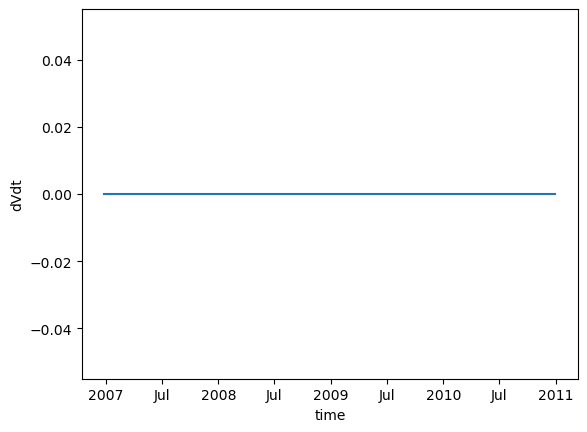

In [102]:
#checking if std on whole ds is same as individually normalizing vars
(deep_norm.dVdt - (deep.dVdt / deep.dVdt.std('time'))).plot()
#checks out!

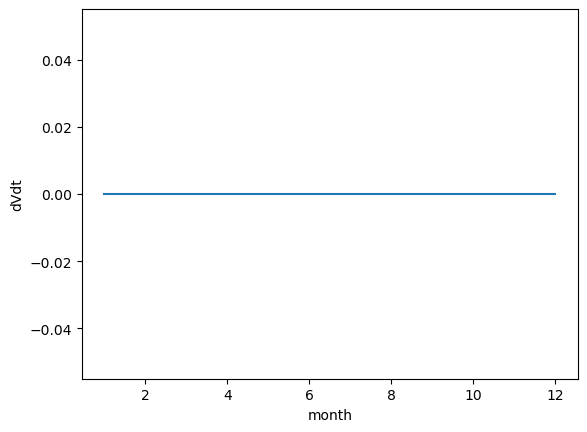

In [103]:
#checking if std on whole ds is same as individually normalizing vars
(bottom_clim_norm.dVdt - (bottom_clim.dVdt / bottom_clim.dVdt.std('month'))).plot()
#checks out!

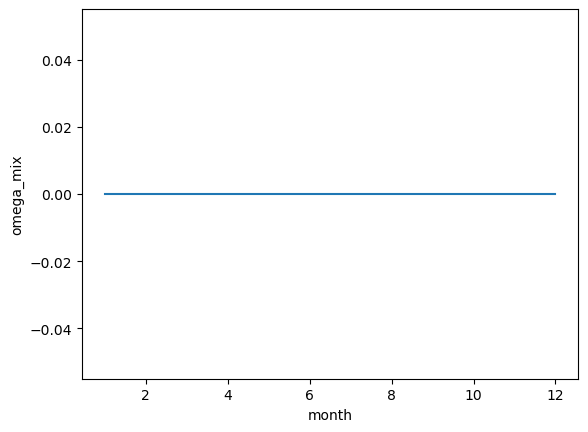

In [104]:
#checking if std on whole ds is same as individually normalizing vars
(bottom_clim_norm.omega_mix - (bottom_clim.omega_mix / bottom_clim.omega_mix.std('month'))).plot()
#checks out!

## Visualize timeseries of wmt terms in wm classes, [seaice, sam, enso indices]

In [41]:
# For Visualization
import panel as pn
import holoviews as hv
from holoviews import opts
import geoviews as gv

import pandas as pd
import param as pm

## Import hvplot apis for xarray and pandas
import hvplot.xarray
import hvplot.pandas

In [42]:
pn.__version__

'1.5.2'

In [133]:
ENSO.drop('month').sel(time=slice('2006', '2010'))

NameError: name 'ENSO' is not defined

In [82]:
SAM.drop('month').rename('zonal mean SLP anom')

<xarray.DataArray 'zonal mean SLP anom' (time: 60)>
array([ 0.172308, -1.533846,  1.665538, -0.839846,  2.373692,  1.806462,
        1.529846, -2.575469, -0.322656,  1.767031,  0.161406,  1.18625 ,
       -0.357692,  2.676154, -0.764462, -0.479846, -0.926308, -0.893538,
       -2.750154, -0.215469, -1.942656, -0.882969,  0.051406,  2.64625 ,
        2.172308,  1.406154,  0.635538, -0.959846, -0.566308,  2.756462,
        0.149846,  0.664531,  0.397344,  2.187031,  1.051406,  0.85625 ,
        1.632308,  1.256154,  0.505538, -0.579846, -0.046308,  0.296462,
       -0.210154, -2.375469, -0.842656,  1.447031, -1.178594,  0.93625 ,
       -0.787692, -1.803846,  0.045538, -0.069846,  1.603692,  2.896462,
        3.289846,  1.304531, -0.392656,  3.167031,  3.901406,  0.09625 ])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01

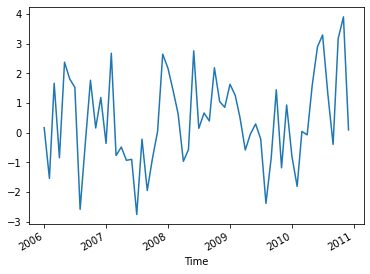

In [83]:
SAM.drop('month').plot()

In [84]:
ENSO.hvplot(x='time')

:Curve   [time]   (sst)

In [85]:
SAM.drop('month').rename('zonal mean SLP anom').hvplot()

:Curve   [time]   (zonal mean SLP anom)

In [139]:
SAM

<xarray.Dataset> Size: 1kB
Dimensions:                        (time: 60)
Coordinates:
    month                          (time) int64 480B 1 2 3 4 5 ... 8 9 10 11 12
  * time                           (time) datetime64[ns] 480B 2006-01-01 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float64 480B 0.09698 ... 0.05417

In [140]:
show__dVdt1 = pn.widgets.Checkbox(name='CDW-dVdt')
show__dVdt2 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt3 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt4 = pn.widgets.Checkbox(name='ISW-dVdt')

dVdt_plot1 = wm_ds_dVdt.cdw.hvplot(ylabel='Sv', title= 'dVdt = Psi + Omega')
dVdt_plot2 = wm_ds_dVdt.wsdw.hvplot()
dVdt_plot3 = wm_ds_dVdt.wsbw.hvplot()
dVdt_plot4 = wm_ds_dVdt.isw.hvplot()

#Psi
show__psi1 = pn.widgets.Checkbox(name='CDW-psi')
show__psi2 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi3 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi4 = pn.widgets.Checkbox(name='ISW-psi')

psi_plot1 = wm_ds_psi_vel.cdw.hvplot()
psi_plot2 = wm_ds_psi_vel.wsdw.hvplot()
psi_plot3 = wm_ds_psi_vel.wsbw.hvplot()
psi_plot4 = wm_ds_psi_vel.isw.hvplot()

#omega
show__omega1 = pn.widgets.Checkbox(name='CDW-omega')
show__omega2 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega3 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega4 = pn.widgets.Checkbox(name='ISW-omega')

omega_plot1 = wm_ds_omega_trans_rate.cdw.hvplot()
omega_plot2 = wm_ds_omega_trans_rate.wsdw.hvplot()
omega_plot3 = wm_ds_omega_trans_rate.wsbw.hvplot()
omega_plot4 = wm_ds_omega_trans_rate.isw.hvplot()

#omega_mix
show__omega_mix1 = pn.widgets.Checkbox(name='CDW-omega_mix')
show__omega_mix2 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix3 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix4 = pn.widgets.Checkbox(name='ISW-omega_mix')

omega_mix_plot1 = wm_ds_omega_mix.cdw.hvplot()
omega_mix_plot2 = wm_ds_omega_mix.wsdw.hvplot()
omega_mix_plot3 = wm_ds_omega_mix.wsbw.hvplot()
omega_mix_plot4 = wm_ds_omega_mix.isw.hvplot()

#omega_surf_slt
show__slt1 = pn.widgets.Checkbox(name='CDW-omega_surf_SLT')
show__slt2 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt3 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt4 = pn.widgets.Checkbox(name='ISW-omega_surf_SLT')

omega_slt_plot1 = wm_ds_omega_surf_slt.cdw.hvplot()
omega_slt_plot2 = wm_ds_omega_surf_slt.wsdw.hvplot()
omega_slt_plot3 = wm_ds_omega_surf_slt.wsbw.hvplot()
omega_slt_plot4 = wm_ds_omega_surf_slt.isw.hvplot()

#omega_surf_th
show__th1 = pn.widgets.Checkbox(name='CDW-omega_surf_TH')
show__th2 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th3 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th4 = pn.widgets.Checkbox(name='ISW-omega_surf_TH')

omega_th_plot1 = wm_ds_omega_surf_th.cdw.hvplot()
omega_th_plot2 = wm_ds_omega_surf_th.wsdw.hvplot()
omega_th_plot3 = wm_ds_omega_surf_th.wsbw.hvplot()
omega_th_plot4 = wm_ds_omega_surf_th.isw.hvplot()

#Indices
show__ENSO = pn.widgets.Checkbox(name='ENSO')
show__SAM = pn.widgets.Checkbox(name='SAM')
show__SOSE = pn.widgets.Checkbox(name='SOSE')

enso_plot = ENSO.drop('month').sel(time=slice('2006', '2010')).hvplot()
sam_plot = SAM.__xarray_dataarray_variable__.drop_vars('month').rename('zonal mean SLP anom').hvplot()
sose_plot = sose_resampled.drop('Z').hvplot()


@pn.depends(show__dVdt1.param.value, show__dVdt2.param.value, show__dVdt3.param.value, show__dVdt4.param.value,
            show__psi1.param.value, show__psi2.param.value, show__psi3.param.value, show__psi4.param.value,
            show__omega1.param.value, show__omega2.param.value, show__omega3.param.value, show__omega4.param.value,
            show__omega_mix1.param.value, show__omega_mix2.param.value, show__omega_mix3.param.value, show__omega_mix4.param.value,
            show__slt1.param.value, show__slt2.param.value, show__slt3.param.value, show__slt4.param.value,
            show__th1.param.value, show__th2.param.value, show__th3.param.value, show__th4.param.value,
            show__ENSO.param.value, show__SOSE.param.value, show__SAM.param.value)


def get_plot(dVdt1, dVdt2, dVdt3, dVdt4,
             psi1, psi2, psi3, psi4,
             omega1, omega2, omega3, omega4,
             omega_mix1, omega_mix2, omega_mix3, omega_mix4,
             omega_slt1, omega_slt2, omega_slt3, omega_slt4,
             omega_th1, omega_th2, omega_th3, omega_th4, enso, sose, sam):
    return (dVdt_plot1.opts(alpha=0.9*dVdt1)*dVdt_plot2.opts(alpha=0.9*dVdt2)*dVdt_plot3.opts(alpha=0.9*dVdt3)*dVdt_plot4.opts(alpha=0.9*dVdt4)*
            psi_plot1.opts(alpha=0.9*psi1)*psi_plot2.opts(alpha=0.9*psi2)*psi_plot3.opts(alpha=0.9*psi3)*psi_plot4.opts(alpha=0.9*psi4)*
            omega_plot1.opts(alpha=0.9*omega1)*omega_plot2.opts(alpha=0.9*omega2)*
            omega_plot3.opts(alpha=0.9*omega3)*omega_plot4.opts(alpha=0.9*omega4)*
            omega_mix_plot1.opts(alpha=0.9*omega_mix1)*omega_mix_plot2.opts(alpha=0.9*omega_mix2)*
            omega_mix_plot3.opts(alpha=0.9*omega_mix3)*omega_mix_plot4.opts(alpha=0.9*omega_mix4)*
            omega_slt_plot1.opts(alpha=0.9*omega_slt1)*omega_slt_plot2.opts(alpha=0.9*omega_slt2)*
            omega_slt_plot3.opts(alpha=0.9*omega_slt3)*omega_slt_plot4.opts(alpha=0.9*omega_slt4)*
            omega_th_plot1.opts(alpha=0.9*omega_th1)*omega_th_plot2.opts(alpha=0.9*omega_th2)*
            omega_th_plot3.opts(alpha=0.9*omega_th3)*omega_th_plot4.opts(alpha=0.9*omega_th4)*
            enso_plot.opts(alpha=0.9*enso)*sose_plot.opts(alpha=0.9*sose)*sam_plot.opts(alpha=0.9*sam))

In [141]:
pn.Row(pn.Column(show__dVdt1, show__dVdt2, show__dVdt3, show__dVdt4, 
                 show__psi1, show__psi2, show__psi3, show__psi4,
                 show__omega1, show__omega2, show__omega3, show__omega4,
                 show__omega_mix1, show__omega_mix2, show__omega_mix3, show__omega_mix4,
                 show__slt1, show__slt2, show__slt3, show__slt4,
                 show__th1, show__th2, show__th3, show__th4, show__ENSO, show__SOSE, show__SAM,
                 width=150, max_height=250, height_policy='max', scroll=True), 
                 get_plot, scroll=True)

Row(scroll=True)
    [0] Column(height_policy='max', max_height=250, scroll=True, width=150)
        [0] Checkbox(name='CDW-dVdt')
        [1] Checkbox(name='WSBW-dVdt')
        [2] Checkbox(name='WSBW-dVdt')
        [3] Checkbox(name='ISW-dVdt')
        [4] Checkbox(name='CDW-psi')
        [5] Checkbox(name='WSBW-psi')
        [6] Checkbox(name='WSBW-psi')
        [7] Checkbox(name='ISW-psi')
        [8] Checkbox(name='CDW-omega')
        [9] Checkbox(name='WSBW-omega')
        [10] Checkbox(name='WSBW-omega')
        [11] Checkbox(name='ISW-omega')
        [12] Checkbox(name='CDW-omega_mix')
        [13] Checkbox(name='WSBW-omega_mix')
        [14] Checkbox(name='WSBW-omega_mix')
        [15] Checkbox(name='ISW-omega_mix')
        [16] Checkbox(name='CDW-omega_surf_SLT')
        [17] Checkbox(name='WSBW-omega_surf_SLT')
        [18] Checkbox(name='WSBW-omega_surf_SLT')
        [19] Checkbox(name='ISW-omega_surf_SLT')
        [20] Checkbox(name='CDW-omega_surf_TH')
        [21] Checkbox(name='WSBW-omega_surf_TH')
        [22] Checkbox(name='WSBW-omega_surf_TH')
        [23] Checkbox(name='ISW-omega_surf_TH')
        [24] Checkbox(name='ENSO')
        [25] Checkbox(name='SOSE')
        [26] Checkbox(name='SAM')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [88]:
import hvplot.xarray

In [89]:
wm_ds_dVdt.hvplot().opts()

:NdOverlay   [Variable]
   :Curve   [time]   (value)

## Turn wmt terms and indices into dataframes for `pd.corr()` heatmap of correlation matrix

In [142]:
import pandas as pd

In [144]:
dVdt_df = wm_ds_dVdt.resample(time='MS').mean().to_dataframe()
psi_df = wm_ds_psi_vel.resample(time='MS').mean().to_dataframe()
omega_df = wm_ds_omega_trans_rate.resample(time='MS').mean().to_dataframe()
omega_mix_df = wm_ds_omega_mix.resample(time='MS').mean().to_dataframe()
omega_slt_df = wm_ds_omega_surf_slt.resample(time='MS').mean().to_dataframe()
omega_th_df = wm_ds_omega_surf_th.resample(time='MS').mean().to_dataframe()
dVdt_df.head()

cdw  wsdw  wsbw  isw
time                            
2006-01-01  0.0   0.0   0.0  NaN
2006-02-01  0.0   0.0   0.0  NaN
2006-03-01  0.0   0.0   0.0  NaN
2006-04-01  0.0   0.0   0.0  NaN
2006-05-01  0.0   0.0   0.0  NaN

In [145]:
dVdt_df.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
               '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
      

In [146]:
windstress_curl_index[12:]

<xarray.DataArray (time: 60)> Size: 240B
dask.array<getitem, shape=(60,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 480B 2006-01-01 2006-02-01 ... 2010-12-01
    month    (time) int64 480B 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

In [147]:
SAM.coords

Coordinates:
    month    (time) int64 480B 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 480B 2006-01-01 2006-02-01 ... 2010-12-01

In [148]:
ENSO.coords

Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
    month    (time) int64 ...

In [149]:
sose_resampled.coords

Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
    Z        float32 ...

In [151]:
windstress_curl_index[12:].coords

Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [155]:
sose_resampled.time

<xarray.DataArray 'time' (time: 60)>
array(['2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-05-01T00:00:00.000000000', '2008-06-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2008-09-01T00:00:00.000000000', '2008-10-01T00:00:00.000000000',
       '2008-11-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-03-01T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2009-05-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
    Z        float32 ...

In [148]:
heat_flx_index_resampled = heat_flx_index.sel(time=slice('2006', '2010')).resample(time='MS').mean()
fw_flx_index_resampled = fw_flx_index.sel(time=slice('2006', '2010')).resample(time='MS').mean()

In [149]:
fw_flx_index_resampled

<xarray.DataArray 'SIempmr' (time: 60)> Size: 240B
dask.array<groupby_nanmean, shape=(60,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 480B 2006-01-01 2006-02-01 ... 2010-12-01

In [151]:
indices = xr.merge([SAM.__xarray_dataarray_variable__.rename('sam'), ENSO.rename('enso'), 
                    sose_resampled.rename('sose'),
                    windstress_curl_index[12:].rename('windstress_curl'),
                    heat_flx_index_resampled.rename('heat_flx'),
                    fw_flx_index_resampled.rename('fw_flx')]).drop(['month', 'Z'])
indices

<xarray.Dataset> Size: 2kB
Dimensions:          (time: 60)
Coordinates:
  * time             (time) datetime64[ns] 480B 2006-01-01 ... 2010-12-01
Data variables:
    sam              (time) float64 480B 0.09698 -0.8633 ... 2.196 0.05417
    enso             (time) float32 240B ...
    sose             (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    windstress_curl  (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    heat_flx         (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    fw_flx           (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>

In [152]:
indices_df = indices.to_dataframe()
indices_df.head()

sam      enso      sose  windstress_curl  heat_flx    fw_flx
time                                                                         
2006-01-01  0.096981 -0.703412 -0.102403         0.155342  0.403783 -0.276722
2006-02-01 -0.863304 -0.627783 -0.316302         0.445003  0.513655  0.087179
2006-03-01  0.937425 -0.392023 -0.716384         0.457961  1.117003 -0.138983
2006-04-01 -0.472696 -0.160018 -1.526455        -0.185761  0.034595 -0.347855
2006-05-01  1.336000  0.099242 -1.089656        -2.294849 -1.023038 -0.397492

In [153]:
corr_indices = indices_df.corr()
corr_indices

sam      enso      sose  windstress_curl  heat_flx  \
sam              1.000000 -0.283055 -0.005067        -0.588559  0.041907   
enso            -0.283055  1.000000 -0.037990         0.276553  0.066963   
sose            -0.005067 -0.037990  1.000000        -0.117326 -0.195073   
windstress_curl -0.588559  0.276553 -0.117326         1.000000  0.151325   
heat_flx         0.041907  0.066963 -0.195073         0.151325  1.000000   
fw_flx          -0.259258  0.069068 -0.115878         0.145333  0.073910   

                   fw_flx  
sam             -0.259258  
enso             0.069068  
sose            -0.115878  
windstress_curl  0.145333  
heat_flx         0.073910  
fw_flx           1.000000

In [100]:
indices_df.tail()

sam      enso      sose  windstress_curl
time                                                     
2010-08-01  1.304531 -1.156375  0.256971        -0.459329
2010-09-01 -0.392656 -1.372571 -0.005690        -0.887641
2010-10-01  3.167031 -1.459237 -0.085412        -1.363300
2010-11-01  3.901406 -1.470133 -0.432815        -2.025066
2010-12-01  0.096250 -1.439778 -0.463637        -0.376755

In [101]:
pd.concat([dVdt_df, indices_df], axis=1).tail()

cdw      wsdw      wsbw           isw       sam      enso  \
time                                                                         
2010-08-01 -1.224676 -1.173641  0.194186 -3.723622e-16  1.304531 -1.156375   
2010-09-01 -1.145984 -1.033681  0.214360 -3.723622e-16 -0.392656 -1.372571   
2010-10-01 -1.046384 -0.937874  0.270706 -3.723622e-16  3.167031 -1.459237   
2010-11-01 -1.082349 -0.932145  0.217608 -3.723622e-16  3.901406 -1.470133   
2010-12-01 -0.956457 -0.784674  0.363877 -3.723622e-16  0.096250 -1.439778   

                sose  windstress_curl  
time                                   
2010-08-01  0.256971        -0.459329  
2010-09-01 -0.005690        -0.887641  
2010-10-01 -0.085412        -1.363300  
2010-11-01 -0.432815        -2.025066  
2010-12-01 -0.463637        -0.376755

In [158]:
dVdt_ind = pd.concat([dVdt_df, indices_df], axis=1)
psi_ind = pd.concat([psi_df, indices_df], axis=1)
omega_ind = pd.concat([omega_df, indices_df], axis=1)
omega_mix_ind = pd.concat([omega_mix_df, indices_df], axis=1)
omega_slt_ind = pd.concat([omega_slt_df, indices_df], axis=1)
omega_th_ind = pd.concat([omega_th_df, indices_df], axis=1)

In [154]:
deep_norm_df = deep_norm.to_dataframe()
bottom_norm_df = bottom_norm.to_dataframe()

In [155]:
deep_norm_df

dVdt   psi_vel  omega_trans_rate  omega_surf_slt  \
time                                                               
2006-01-01       NaN       NaN               NaN             NaN   
2006-01-06       NaN       NaN               NaN             NaN   
2006-01-11       NaN       NaN               NaN             NaN   
2006-01-16       NaN       NaN               NaN             NaN   
2006-01-21       NaN       NaN               NaN             NaN   
...              ...       ...               ...             ...   
2010-12-11 -1.186767  2.256324         -1.106848       -1.503911   
2010-12-16 -1.168678  2.301151         -1.870144       -1.608927   
2010-12-21 -1.205646  2.377600         -1.444194       -1.700103   
2010-12-26 -1.268481  2.420361         -1.438195       -1.757230   
2010-12-31 -1.269340  2.431682         -1.454999       -1.785507   

            omega_surf_th  omega_mix        R1        R2  
time                                                      
2006-01-01            NaN        NaN       NaN       NaN  
2006-01-06            NaN        NaN       NaN       NaN  
2006-01-11            NaN        NaN       NaN       NaN  
2006-01-16            NaN        NaN       NaN       NaN  
2006-01-21            NaN        NaN       NaN       NaN  
...                   ...        ...       ...       ...  
2010-12-11      -0.390895  -2.214436 -1.391600 -0.531029  
2010-12-16      -0.365702  -2.146249 -1.027967  0.319021  
2010-12-21      -0.309515  -2.170382 -0.954641 -0.251650  
2010-12-26      -0.231270  -2.288126 -1.243902 -0.316040  
2010-12-31      -0.196361  -2.184664 -1.390230 -0.298916  

[366 rows x 8 columns]

In [156]:
bottom_norm_df

dVdt   psi_vel  omega_trans_rate  omega_surf_slt  \
time                                                               
2006-01-01       NaN       NaN               NaN             NaN   
2006-01-06       NaN       NaN               NaN             NaN   
2006-01-11       NaN       NaN               NaN             NaN   
2006-01-16       NaN       NaN               NaN             NaN   
2006-01-21       NaN       NaN               NaN             NaN   
...              ...       ...               ...             ...   
2010-12-11 -0.728561 -0.063491         -0.276282       -1.294910   
2010-12-16 -0.716498 -0.048554         -0.331239       -1.272121   
2010-12-21 -0.681558 -0.014667         -0.307710       -1.267616   
2010-12-26 -0.664094 -0.003138         -0.300391       -1.267516   
2010-12-31 -0.649830  0.002642         -0.294713       -1.267516   

            omega_surf_th  omega_mix        R1        R2  
time                                                      
2006-01-01            NaN        NaN       NaN       NaN  
2006-01-06            NaN        NaN       NaN       NaN  
2006-01-11            NaN        NaN       NaN       NaN  
2006-01-16            NaN        NaN       NaN       NaN  
2006-01-21            NaN        NaN       NaN       NaN  
...                   ...        ...       ...       ...  
2010-12-11      -0.871680   1.841535  1.261077 -0.716224  
2010-12-16      -0.871621   1.859393  1.267359 -0.566348  
2010-12-21      -0.870844   1.908367  1.298547 -0.581914  
2010-12-26      -0.869003   1.929778  1.293301 -0.579847  
2010-12-31      -0.868434   1.948502  1.299386 -0.579597  

[366 rows x 8 columns]

In [159]:
dVdt_corr = dVdt_ind.corr()
psi_corr = psi_ind.corr()
omega_corr = omega_ind.corr()
omega_mix_corr = omega_mix_ind.corr()
omega_slt_corr = omega_slt_ind.corr()
omega_th_corr = omega_th_ind.corr()

### Create heatmap of correlation matrices

In [160]:
import seaborn as sn

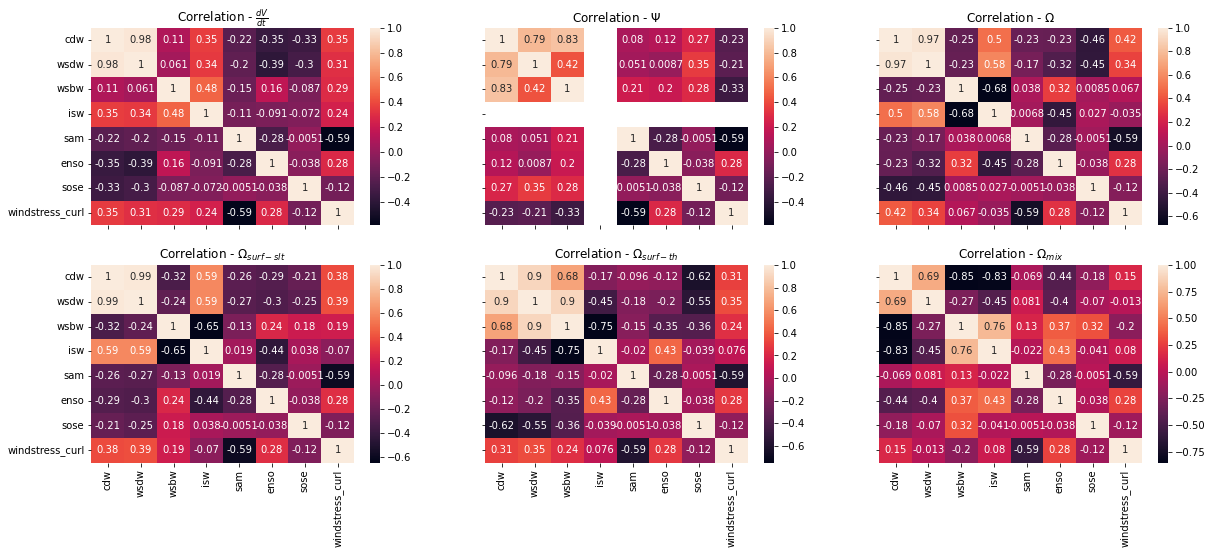

In [107]:
fig, ax = plt.subplots(2,3, figsize=(20,8), sharex=True, sharey=True)

sn.heatmap(dVdt_corr, annot=True, ax=ax[0,0])
ax[0,0].set_title(r'Correlation - $\frac{dV}{dt}$')

sn.heatmap(psi_corr, annot=True, ax=ax[0,1])
ax[0,1].set_title(r'Correlation - $\Psi$')

sn.heatmap(omega_corr, annot=True, ax=ax[0,2])
ax[0,2].set_title(r'Correlation - $\Omega$')

sn.heatmap(omega_slt_corr, annot=True, ax=ax[1,0])
ax[1,0].set_title(r'Correlation - $\Omega_{surf-slt}$')

sn.heatmap(omega_th_corr, annot=True, ax=ax[1,1])
ax[1,1].set_title(r'Correlation - $\Omega_{surf-th}$')

sn.heatmap(omega_mix_corr, annot=True, ax=ax[1,2])
ax[1,2].set_title(r'Correlation - $\Omega_{mix}$');

### Saving Data

In [66]:
import json
with open('/home/jovyan/WMT-project/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [166]:
indices

<xarray.Dataset>
Dimensions:          (time: 60)
Coordinates:
  * time             (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
Data variables:
    sam              (time) float64 0.1723 -1.534 1.666 ... 3.167 3.901 0.09625
    enso             (time) float32 -0.7034 -0.6278 -0.392 ... -1.47 -1.44
    sose             (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    windstress_curl  (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    heat_flx         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    fw_flx           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [ ]:
#uploading indices as xr ds for zarr upload
gcsmap_indices = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/indices.zarr')
indices.to_zarr(gcsmap_indices, mode='w')

In [38]:
#uploading deep as xr ds for zarr upload
gcsmap_deep = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/deep.zarr')
deep_norm.chunk({'time':-1}).to_zarr(gcsmap_deep, mode='w')

In [40]:
#uploading bottom as xr ds for zarr upload
gcsmap_bottom = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/bottom.zarr')
bottom_norm.chunk({'time':-1}).to_zarr(gcsmap_bottom, mode='w')

In [48]:
#uploading deep_clim
gcsmap_deep_clim = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/deep_clim.zarr')
deep_clim.to_zarr(gcsmap_deep_clim, mode='w')

In [49]:
#uploading bottom_clim 
gcsmap_bottom_clim = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/bottom_clim.zarr')
bottom_clim.to_zarr(gcsmap_bottom_clim, mode='w')

In [50]:
#uploading clim_ds
gcsmap_clim_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/clim_ds.zarr')
clim_ds.to_zarr(gcsmap_clim_ds, mode='w')

In [52]:
#uploading clim_ds
gcsmap_anom_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/anom_ds.zarr')
new_ds.chunk({'time':-1}).to_zarr(gcsmap_anom_ds, mode='w')

Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1131)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 696, in _handle_events
    self._handle

In [47]:
clim_ds

<xarray.Dataset>
Dimensions:           (sigma2_bin: 99, month: 12)
Coordinates:
  * sigma2_bin        (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt              (month, sigma2_bin) float64 -16.72 -16.59 ... -0.02164
    psi_vel           (month, sigma2_bin) float64 -0.4061 -0.4329 ... 0.0 0.0
    omega_trans_rate  (month, sigma2_bin) float32 -12.68 -12.86 ... -0.02494
    omega_surf_slt    (month, sigma2_bin) float32 -2.003 -1.943 ... 0.0 0.0
    omega_surf_th     (month, sigma2_bin) float32 -4.877 -4.944 ... -0.008462
    omega_mix         (month, sigma2_bin) float32 -6.315 -6.494 ... -0.01647
    R1                (month, sigma2_bin) float64 dask.array<chunksize=(1, 99), meta=np.ndarray>
    R2                (month, sigma2_bin) float64 -2.811 -2.8 ... 0.003102

In [43]:
bottom_norm

<xarray.Dataset>
Dimensions:           (time: 366)
Coordinates:
  * time              (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-31
Data variables:
    dVdt              (time) float64 nan nan nan nan ... -0.6816 -0.6641 -0.6498
    psi_vel           (time) float64 nan nan nan ... -0.01467 -0.003138 0.002642
    omega_trans_rate  (time) float64 nan nan nan nan ... -0.3077 -0.3004 -0.2947
    omega_surf_slt    (time) float64 nan nan nan nan ... -1.268 -1.268 -1.268
    omega_surf_th     (time) float64 nan nan nan nan ... -0.8708 -0.869 -0.8684
    omega_mix         (time) float64 nan nan nan nan ... 1.859 1.908 1.93 1.949
    R1                (time) float64 dask.array<chunksize=(79,), meta=np.ndarray>
    R2                (time) float64 nan nan nan nan ... -0.5819 -0.5798 -0.5796

In [44]:
bottom_clim_norm

<xarray.Dataset>
Dimensions:           (month: 12)
Coordinates:
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt              (month) float64 -2.427 -1.978 -1.693 ... -1.888 -2.083
    psi_vel           (month) float64 -4.675 -4.353 -3.984 ... -2.674 -2.877
    omega_trans_rate  (month) float64 -1.209 -0.8381 -0.6435 ... -0.9075 -0.8722
    omega_surf_slt    (month) float64 -0.00608 0.01208 ... -1.467 -0.6684
    omega_surf_th     (month) float64 -1.054 -0.5088 -0.1694 ... 0.05849 -0.4974
    omega_mix         (month) float64 -4.73 -4.426 -4.458 ... -3.937 -4.767
    R1                (month) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    R2                (month) float64 -0.07833 -0.06168 ... -0.7201 -0.8319